<a href="https://colab.research.google.com/github/Lohithl27/localrepo/blob/main/DP_L_day5_ml_R_%26_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANN

### Importing Libraries

In [ ]:
# Importing required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np


### Load and Visualize the Digit at Index 13

<Figure size 640x480 with 0 Axes>

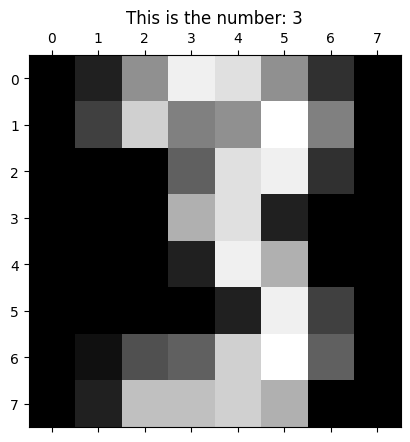

In [ ]:
# Load the digits dataset (8x8 grayscale images of digits 0–9)
digits = load_digits()

# Select the 14th sample (index 13) which is a digit '3'
index = 13

# Show images in black and white
plt.gray()

# Show the first digit image
plt.matshow(digits.images[13])

# Write the correct label (e.g., 0–9) on top
plt.title("This is the number: " + str(digits.target[13]))

# Show the picture
plt.show()

### Prepare Inputs (X) and Labels (y)




In [ ]:
# X contains the pixel values (each image is 8x8 = 64 features)
X = digits.data

# y is the label: 1 if digit is 3, else 0 (binary classification)
y = np.array([1 if label == 3 else 0 for label in digits.target])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> X[i] is a 64-length vector like:
> x=[x1,x2,...,x64]

> Each value is a grayscale pixel intensity between 0 and 16.

> y[i] is:

>   1 if that image is a 3

>   0 otherwise

### Train the ANN (MLP)

In [ ]:
# MLPClassifier = Multi-layer Perceptron (Artificial Neural Network)
# hidden_layer_sizes=(16,) means 1 hidden layer with 16 neurons
model = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', max_iter=500, random_state=42)

# Training the model
model.fit(X_train, y_train)


# Each hidden neuron does:
#       64​
# zj​ =  ∑  xi​⋅wij​+bj​
#       i=1

# aj​=max(0,zj​)

# The final neuron calculates:
#       64​
#  z​ =  ∑  ai​⋅wij​+b
#       i=1

# y = 1 / (1+e**-z)

MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42)

| Symbol                | Meaning                          | Simple Explanation                                                                   |
| --------------------- | -------------------------------- | ------------------------------------------------------------------------------------ |
| `x`                   | Input                            | Each pixel value from the image. (For 8×8 you'll have 64 such `x` values.)          |
| `w`                   | Weight                           | Importance of each input. A number the model learns. Multiplies with each `x`.       |
| `z`                   | Weighted Sum (before activation) | Total sum of all (x × w) + bias. Like raw score before deciding "yes/no".            |
| `b`                   | Bias                             | A shift value that helps adjust the neuron's decision point.                         |
| `f` or `activation()` | Activation Function              | A function (like ReLU or sigmoid) that turns `z` into output, often between 0 and 1. |
| `y`                   | Final Output                     | The neuron's decision. Example: "Is it a 3?" Yes (1) or No (0).                      |
| `i`                   | Input index                      | Index of input pixel (e.g., 0 to 63 for a 8x8 image).                                |
| `j`                   | Hidden neuron index              | Index of a neuron in the hidden layer. Helps track which neuron we are referring to. |
| `X`                   | Input dataset                    | Many images, each turned into a list of pixel values.                                |
| `Y`                   | Target labels                    | True answers (like: \[3, 1, 0, 3, 4, ...])                                           |
| `model.predict()`     | Prediction Function              | Function that takes new inputs and gives back a guess (3 or Not 3).                  |


### Model Accuracy



In [ ]:
print("Training accuracy:", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy : 0.9888888888888889


### Predict a Single Sample (Is it a 3?)

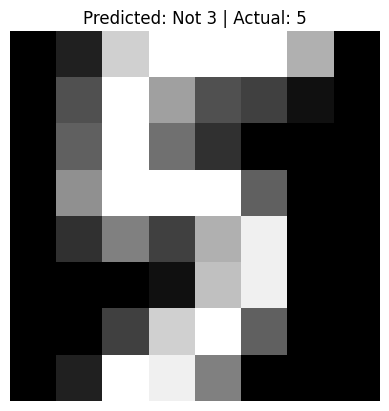

❌ NO, the model thinks this is NOT a 3.


In [ ]:
# Choose any sample index to test
sample_index = 32  # You can try other indices like 100, 521, etc.

# Prepare the input
sample_image = X[sample_index].reshape(1, -1)
actual_label = digits.target[sample_index]

# Predict using the model
predicted = model.predict(sample_image)[0]  # 1 = it's a 3, 0 = not a 3

# Show the image and result
plt.imshow(digits.images[sample_index], cmap='gray')
plt.title(f"Predicted: {'3' if predicted == 1 else 'Not 3'} | Actual: {actual_label}")
plt.axis('off')
plt.show()

# Print a clearer message
# print (predicted)
if predicted == 1:
    print("✅ YES, the model thinks this is a 3.")
else:
    print("❌ NO, the model thinks this is NOT a 3.")